In [2]:
print("hello")

hello


In [3]:
from graph_tool.all import *


(ipykernel_launcher:3202): Gtk-WARNING **: 09:06:42.467: Locale not supported by C library.
	Using the fallback 'C' locale.


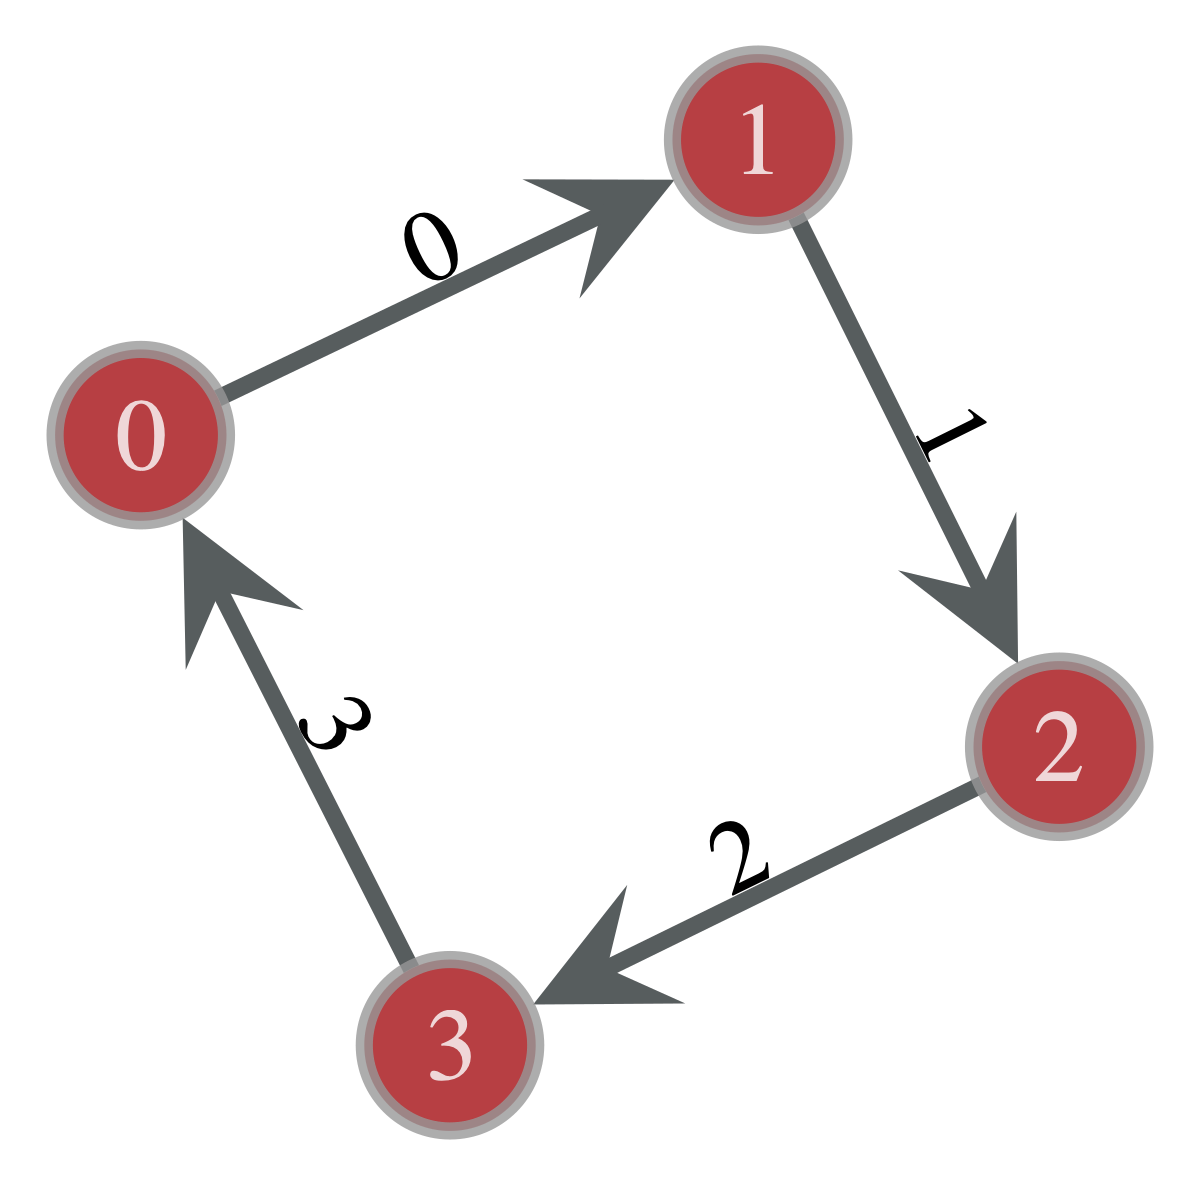

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b550, at 0x162a1baf0>

In [4]:
g = Graph()
v0 = g.add_vertex()
v1 = g.add_vertex()
v2 = g.add_vertex()
v3 = g.add_vertex()
e0 = g.add_edge(v0,v1)
e1 = g.add_edge(v1,v2)
e2 = g.add_edge(v2,v3)
e3 = g.add_edge(v3,v0)
# graph_draw(g, vertex_text=g.vertex_index,  edge_text=g.edge_index,output="four-nodes.pdf")
graph_draw(g, vertex_text=g.vertex_index,  edge_text=g.edge_index)

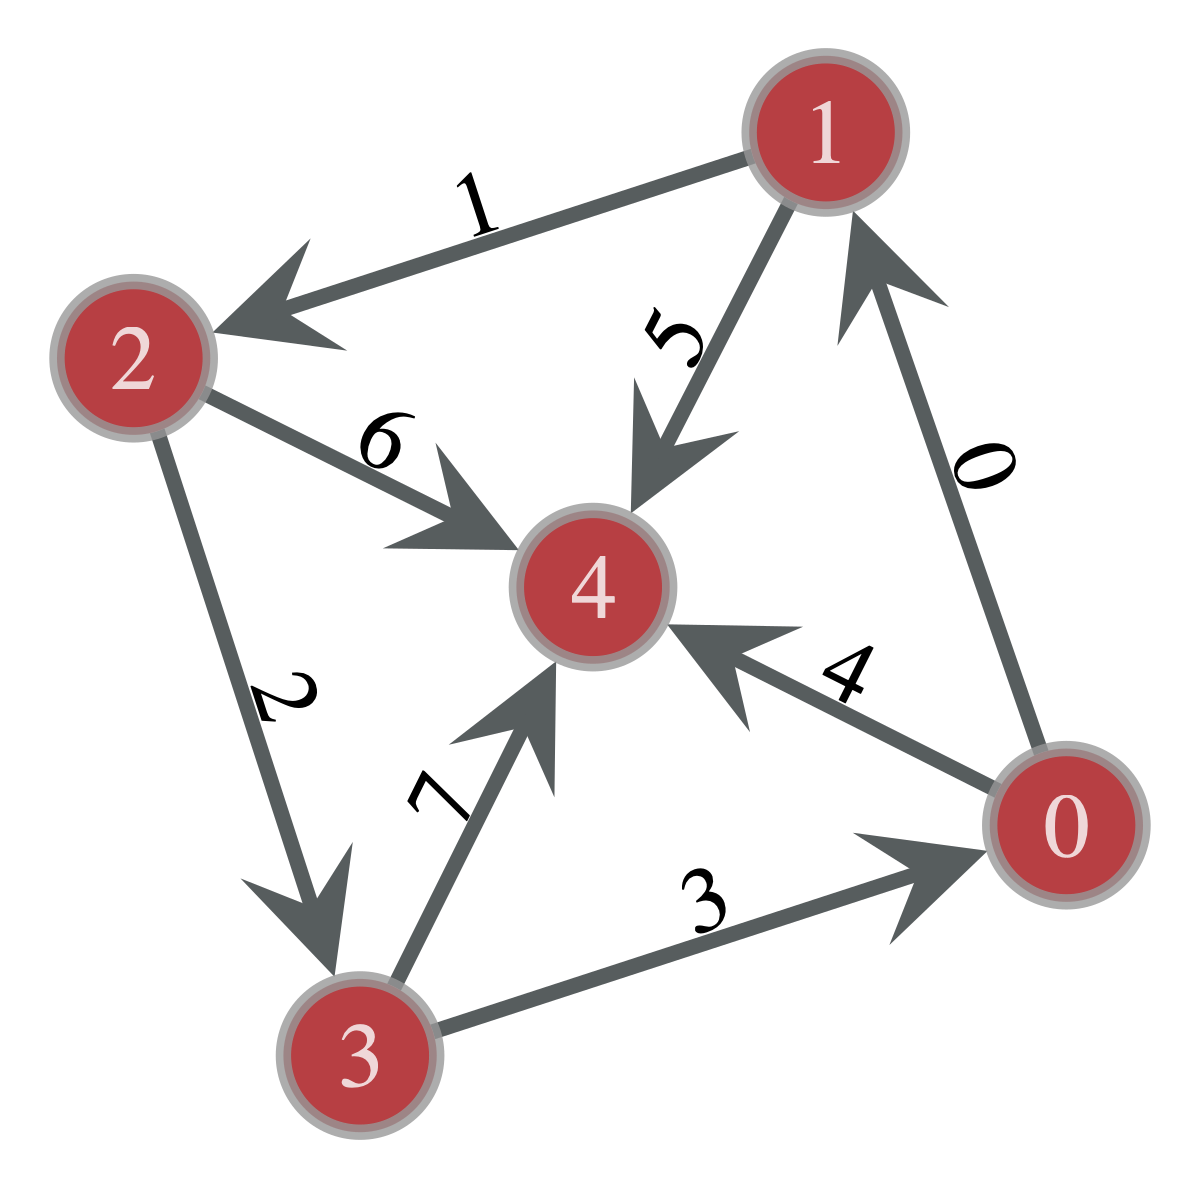

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a34d90, at 0x162a2b8e0>

In [5]:
g2 = Graph(g) 

v4 = g2.add_vertex()
e4 = g2.add_edge(v0,v4)
e5 = g2.add_edge(v1,v4)
e6 = g2.add_edge(v2,v4)
e7 = g2.add_edge(v3,v4)

graph_draw(g2, vertex_text=g2.vertex_index,  edge_text=g2.edge_index)

In [6]:
print(v4.in_degree())
print(v4.out_degree())

4
0


In [7]:
print(g2.vertices())
for vertex in g2.vertices():
    print("vertex index:", vertex, "out-degree:", vertex.out_degree(), "in-degree:", vertex.in_degree())


vertex index: 0 out-degree: 2 in-degree: 1
vertex index: 1 out-degree: 2 in-degree: 1
vertex index: 2 out-degree: 2 in-degree: 1
vertex index: 3 out-degree: 2 in-degree: 1
vertex index: 4 out-degree: 0 in-degree: 4


In [8]:
print(g2.edges())
for edge in g2.edges():
    print("edge index:", edge, "source:", edge.source(), "target:", edge.target())


edge index: (0, 1) source: 0 target: 1
edge index: (0, 4) source: 0 target: 4
edge index: (1, 2) source: 1 target: 2
edge index: (1, 4) source: 1 target: 4
edge index: (2, 3) source: 2 target: 3
edge index: (2, 4) source: 2 target: 4
edge index: (3, 0) source: 3 target: 0
edge index: (3, 4) source: 3 target: 4


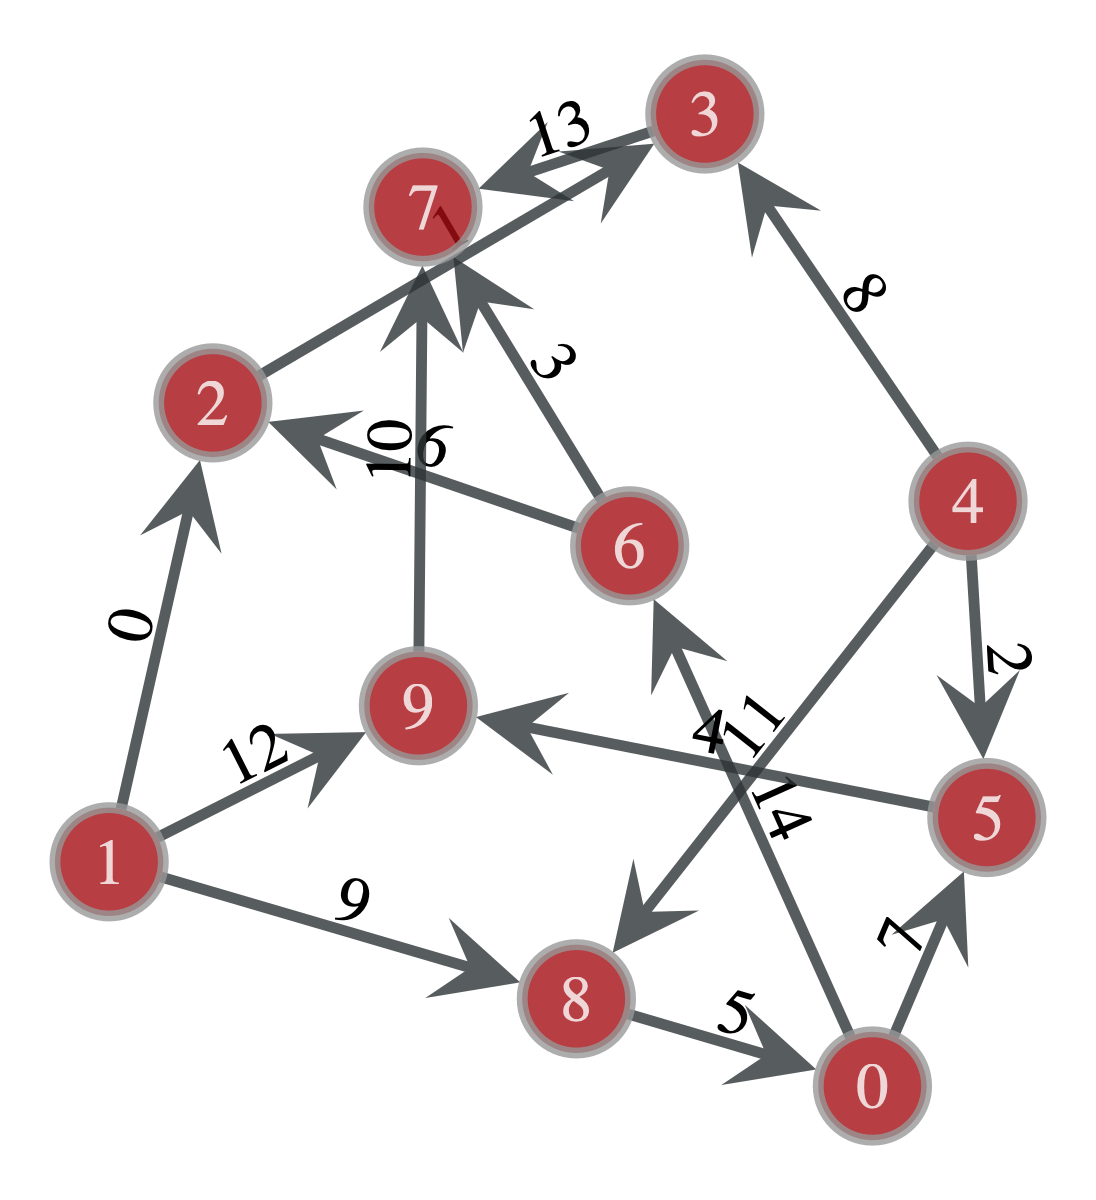

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b730, at 0x164e88df0>

In [9]:
g3 = Graph()
vlist = g3.add_vertex(10)
edge_array = [1, 2], [2, 3],[4,5],[6,7], [5,9],[8,0], [6,2],[0,5],[4,3],[1,8],[9,7],[4,8],[1,9],[3,7],[0,6]
e0 = g3.add_edge_list(edge_array)
graph_draw(g3, vertex_text=g3.vertex_index,  edge_text=g3.edge_index)

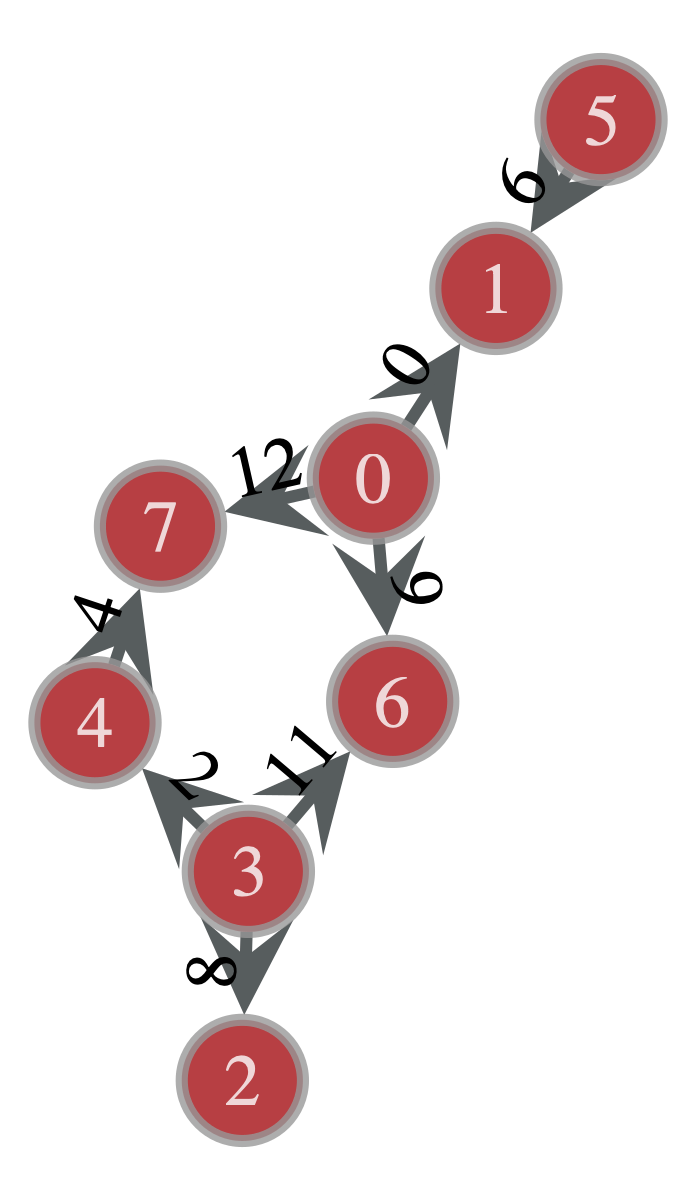

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b730, at 0x162a34310>

In [10]:
g3.remove_vertex([0,7])

e = g.edge(1, 2)
g3.remove_edge(e)

graph_draw(g3, vertex_text=g3.vertex_index,  edge_text=g3.edge_index)

## Iteration

In [11]:
gIter = Graph()
v1 = gIter.add_vertex()
v2 = gIter.add_vertex()
v3 = gIter.add_vertex()
e = gIter.add_edge(gIter.vertex(v1),gIter.vertex(v2))
e = gIter.add_edge(gIter.vertex(v2),gIter.vertex(v3))
e = gIter.add_edge(gIter.vertex(v3),gIter.vertex(v1))
for v in gIter.vertices():
    print("vertice index: ", v)
    print("out edges and neighbors")
    for e in v.out_edges():
       print(e)
    for w in v.out_neighbors():
       print(w)
    print("in edges and neighbors")
    for e in v.in_edges():
       print(e)
    for w in v.in_neighbors():
       print(w)

vertice index:  0
out edges and neighbors
(0, 1)
1
in edges and neighbors
(2, 0)
2
vertice index:  1
out edges and neighbors
(1, 2)
2
in edges and neighbors
(0, 1)
0
vertice index:  2
out edges and neighbors
(2, 0)
0
in edges and neighbors
(1, 2)
1


In [12]:
for v in gIter.iter_vertices():
    print(v)
for e in gIter.iter_edges():
    print(e)

0
1
2
[0, 1]
[1, 2]
[2, 0]


## Faster iteration

In [13]:
for v in gIter.iter_vertices():
    print("vertice index: ", v)
    print("out edges and neighbors")
    for e in gIter.iter_out_edges(v):
       print(e)
    for w in gIter.iter_out_neighbors(v):
       print(w)
    print("in edges and neighbors")
    for e in gIter.iter_in_edges(v):
       print(e)
    for w in gIter.iter_in_neighbors(v):
       print(w)

vertice index:  0
out edges and neighbors
[0, 1]
1
in edges and neighbors
[2, 0]
2
vertice index:  1
out edges and neighbors
[1, 2]
2
in edges and neighbors
[0, 1]
0
vertice index:  2
out edges and neighbors
[2, 0]
0
in edges and neighbors
[1, 2]
1


## Property maps

In [14]:
from numpy.random import randint

g = Graph()
g.add_vertex(10)

# insert some random links
for s,t in zip(randint(0, 10, 10), randint(0, 10, 10)):
    g.add_edge(g.vertex(s), g.vertex(t))

vprop_string = g.new_vertex_property("string")


for i in range(5):
    v = g.vertex(i)
    vprop_string[v] = "marked"

for vertex in g.iter_vertices():
    if (vprop_string[vertex] != "marked"):
        print(vertex)





5
6
7
8
9


## Internal propmap

In [15]:

g.vertex_properties["mark"] = vprop_string
g.list_properties()

vprop_val = g.new_vertex_property("int")
g.vp.val = vprop_val                        
# equivalent to g.vertex_properties["foo"] = vprop
for v,attribute in zip(g.iter_vertices(),randint(100,1000,10)):
    g.vp.val[v] = attribute
    print(g.vp.val[v])
g.list_properties()



mark           (vertex)  (type: string)
307
718
483
785
146
246
404
790
944
411
mark           (vertex)  (type: string)
val            (vertex)  (type: int32_t)


## Property value as text

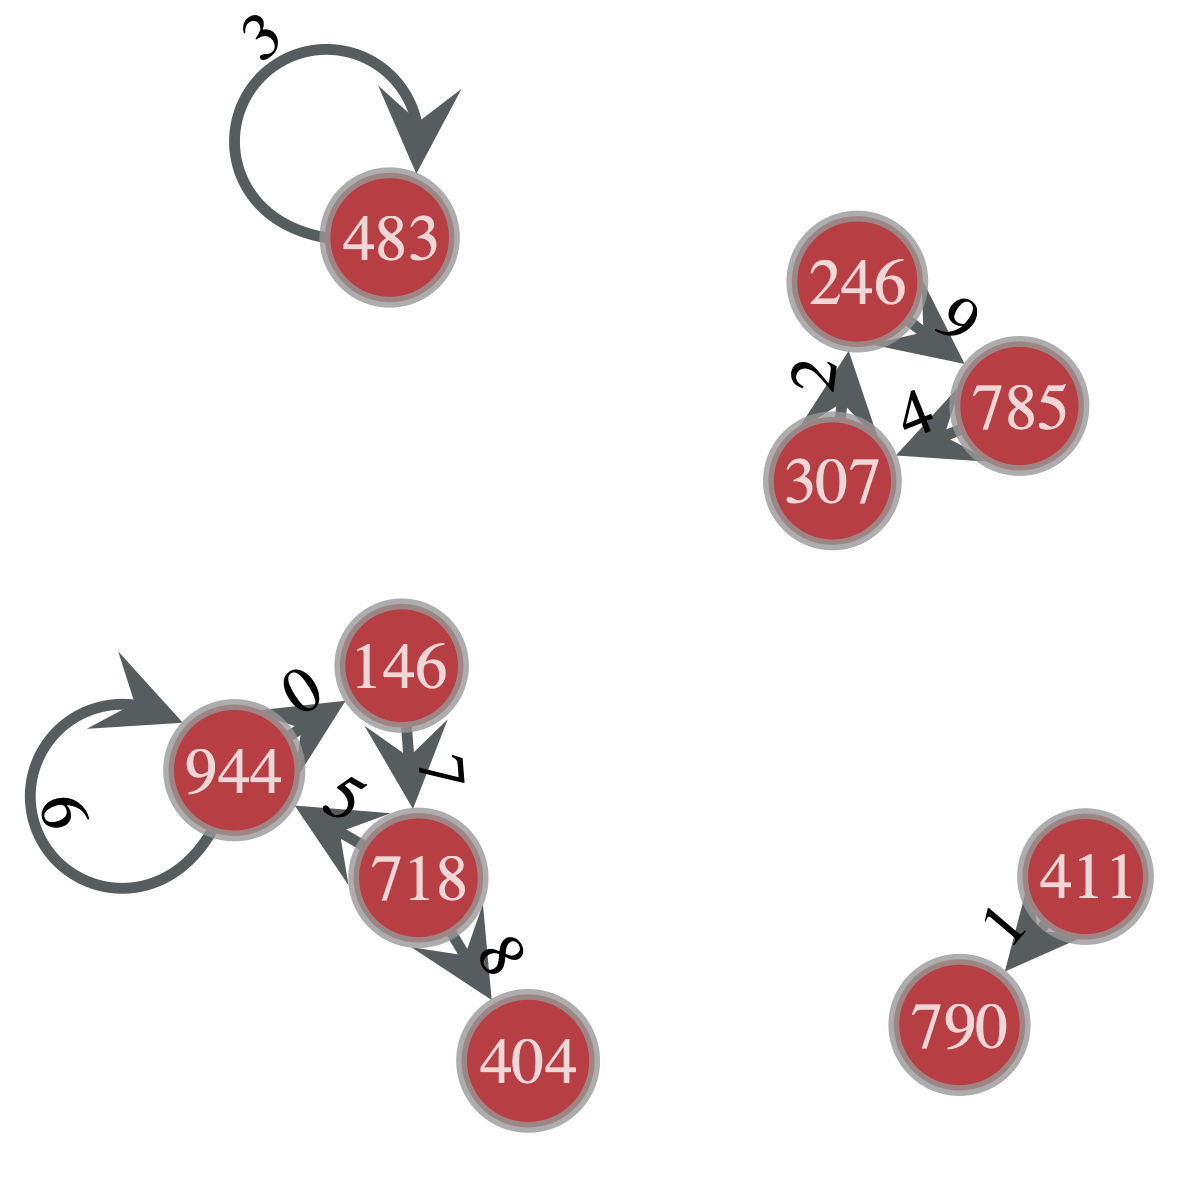

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x164e88850, at 0x164e95070>

In [16]:
graph_draw(g, vertex_text=g.vp.val, edge_text=g.edge_index)

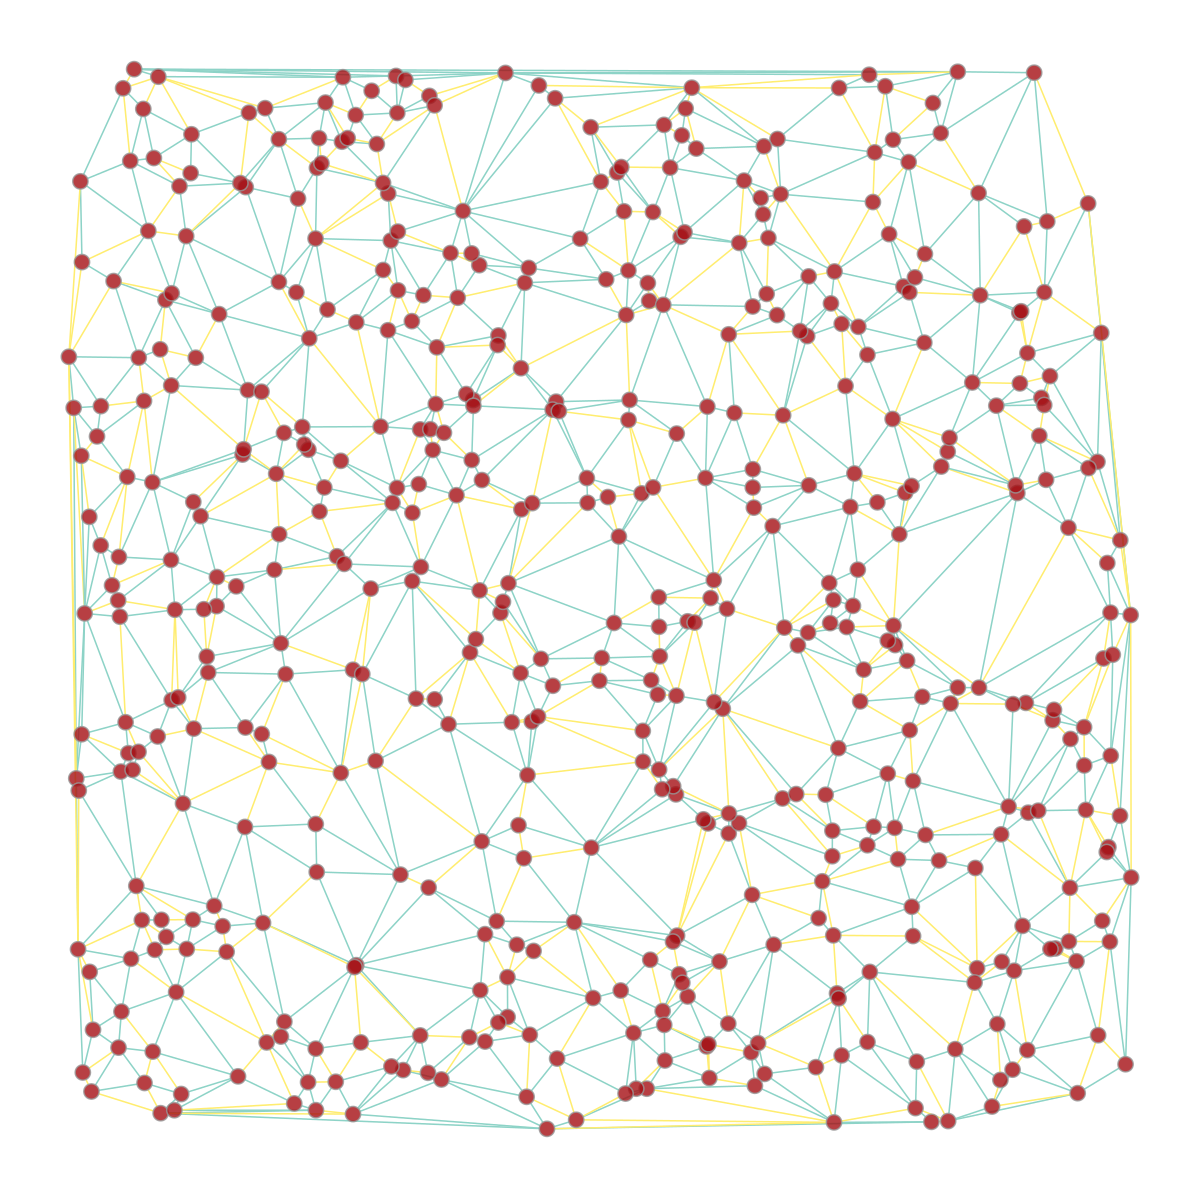

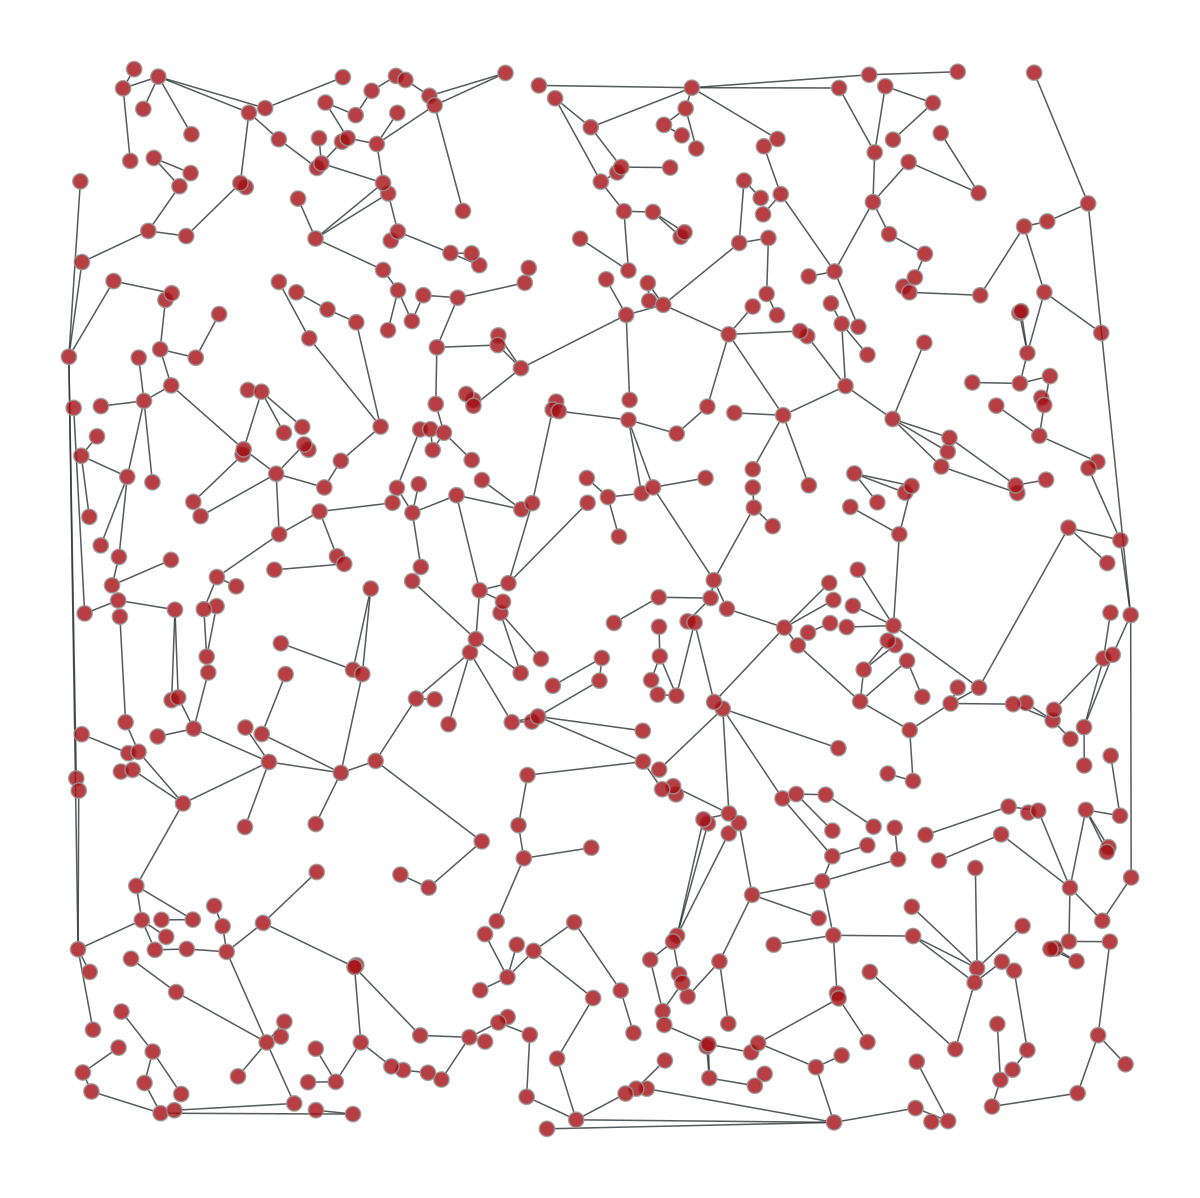

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b0d0, at 0x162a2ba30>

In [25]:
from numpy.random import random
g, pos = triangulation(random((500, 2)) * 4, type="delaunay")
tree = min_spanning_tree(g)
graph_draw(g, pos=pos, edge_color=tree)

g.set_edge_filter(tree)
graph_draw(g, pos=pos)



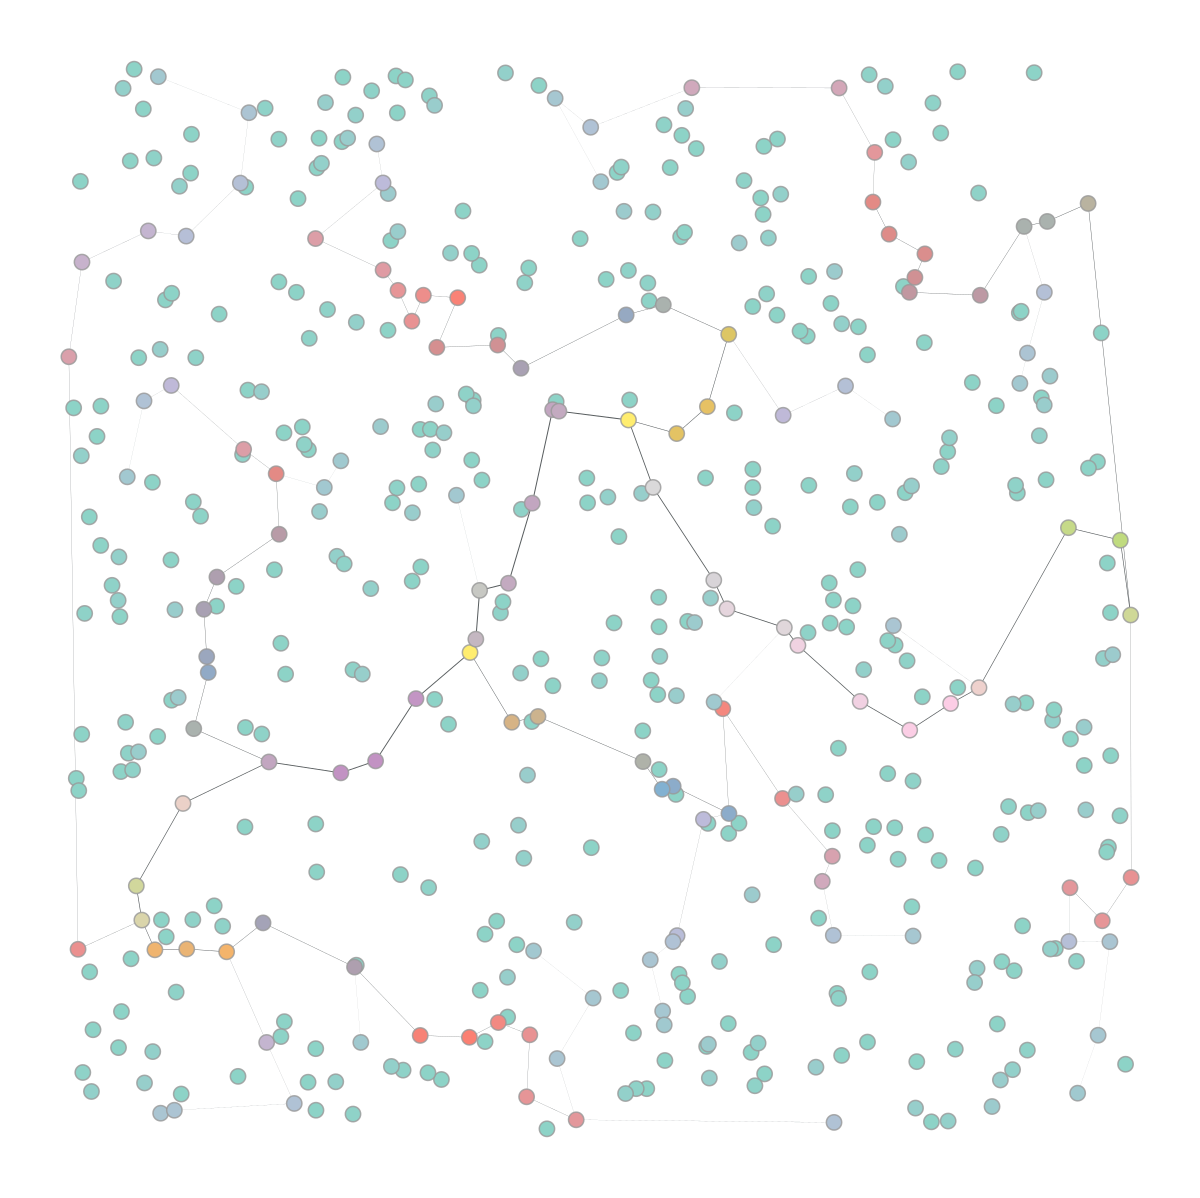

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b0d0, at 0x162a34f70>

In [26]:
bv, be = betweenness(g)
graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be)

<class 'graph_tool.EdgePropertyMap'>
<class 'graph_tool.PropertyArray'>
<class 'graph_tool.PropertyArray'>
[0.11654509 0.10593988 0.         ... 0.004      0.01590381 0.01983968]
0.5009699398797595
[1.16319444 1.05734767 0.         ... 0.03992256 0.15873016 0.19801267]


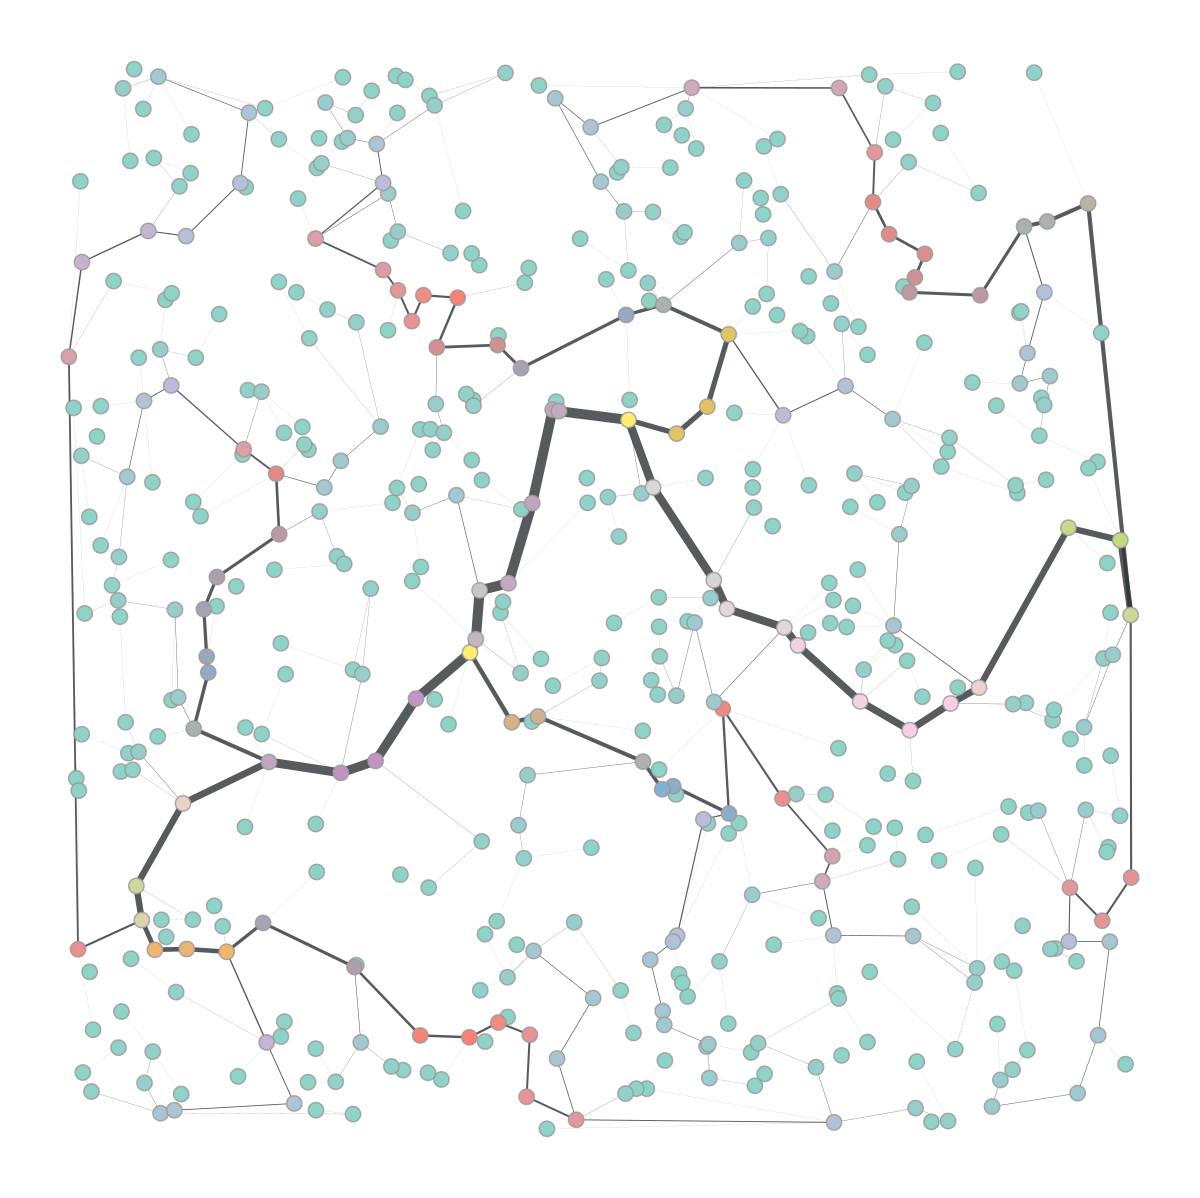

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x162a2b0d0, at 0x16607f460>

In [31]:
bv, be = betweenness(g)
print(type(be))
print(type(be.a))
print(type(be.a.max()))
print(be.a)
print(be.a.max())

# a way to highlight edges with more betweenness
# multiply by the max * 5 (values bellow 1) 
be.a /= be.a.max() / 5
print(be.a)


graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be)